<a href="https://colab.research.google.com/github/ishreygoel/Minor-Project/blob/main/BA_MINOR_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("car", limit= 30 , output_dir='images',adult_filter_off= True)

[%] Downloading Images to /content/images/car


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.carbodydesign.com/archive/2009/08/05-sv-9-competizione-images/SV-9-Competizione-4-lg.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static.carthrottle.com/workspace/uploads/posts/2017/12/0fcad9c9368abebdbfb8aaf0211bf96b.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://jaikrishnaamaruti.com/uploads/truevalue_cars/0_27-01-2018_16-03-53.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://icdn-4.motor1.com/images/mgl/8gJ93/s1/amc-amx-the-first-true-sports-car-of-the-1960s.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://farm9.staticflickr.com/8012/7170866083_8504026441_o.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://dmi3w0goirzgw.cloudfront.net/gallery-images/1600/406000/600/406638.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://smclassiccars.com/upload

In [ ]:
downloader.download("bike", limit= 30 , output_dir='images',adult_filter_off= True)

[%] Downloading Images to /content/images/bike


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://fitnessequipmenteugene.com/wp-content/uploads/2019/09/True-Fitness-ES900-Upright-Bike-Side.png
[%] File Downloaded !

[%] Downloading Image #2 from https://www.toughtrain.com/wp-content/uploads/2013/07/True-LC900-Upright-Bike.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://fitnessequipmenteugene.com/wp-content/uploads/2019/09/True-Fitness-ES900-Upright-Bike.png
[%] File Downloaded !

[%] Downloading Image #4 from https://krtconcepts.com/fitness/wp-content/uploads/2014/09/33.jpg
[!] Issue getting: https://krtconcepts.com/fitness/wp-content/uploads/2014/09/33.jpg
[!] Error:: <urlopen error timed out>
[%] Downloading Image #4 from https://www.fitnessgallery.com/wp-content/uploads/2018/06/TRUE-ES900-Upright-Bike-at-Fitness-Gallery.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.fitnessgallery.com/wp-content/upl

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR= '/content/images'
CATEGORIES= ['car', 'bike']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path=os.path.join(DATADIR , category)
  

  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized =resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data= np.array(flat_data)
target= np.array(target)
images= np.array(images)

In [ ]:
flat_data.ndim

2

<BarContainer object of 2 artists>

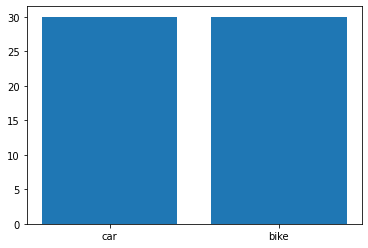

In [ ]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split (flat_data, target,random_state= 45)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid= [
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001 , 0.0001],'kernel':['rbf']},
]
svc= svm.SVC(probability= True)
clf =GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_test

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [ ]:
confusion_matrix(y_pred,y_test)

array([[6, 0],
       [1, 8]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model=pickle.load(open('img_model.p','rb'))

Enter your URLhttp://images.unsplash.com/photo-1542362567-b07e54358753?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max
(720, 1080, 3)
 PREDICTED OUTPUT: car


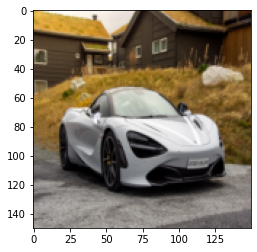

In [ ]:
flat_data=[]
url= input('Enter your URL')
img= imread(url)
img_resized=resize(img ,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out= model.predict(flat_data)
y_out= CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')